<a href="https://colab.research.google.com/github/shabnajL/Tweet_Emotion_Recognition/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [2]:
!pip install nlp


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.13.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [4]:
!pip install --upgrade datasets


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import datasets
dataset = datasets.load_dataset('emotion') 

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [8]:
print(train['label'])

[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1, 4, 1, 3, 3, 2, 0, 5, 1, 3, 0, 0, 3, 2, 5, 0, 2, 1, 3, 1, 0, 0, 1, 1, 4, 0, 3, 1, 2, 1, 1, 

In [9]:
def get_tweet(data):
  tweets = [x['text'] for x in data]
  labels = [x['label'] for x in data]
  return tweets, labels

In [14]:
tweets, labels = get_tweet(train) #collecting tweets and labels for the training set

In [15]:
print(set(labels))

{0, 1, 2, 3, 4, 5}


In [17]:
tweets[2] , labels[2]


('im grabbing a minute to post i feel greedy wrong', 3)

In [18]:

tweets[34] , labels[34]

('i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex won t be expected subsequently',
 1)

In [19]:
tweets[10] , labels[10]

('i feel like i have to make the suffering i m seeing mean something', 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
tokenizer = Tokenizer(num_words=1000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [22]:
tweets[2] , labels[2] # examples of a tweet text

('im grabbing a minute to post i feel greedy wrong', 3)

In [23]:
tokenizer.texts_to_sequences([tweets[2]]) # tokenization of the tweet[2] text

[[17, 1, 7, 1, 5, 286, 2, 3, 495, 438]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

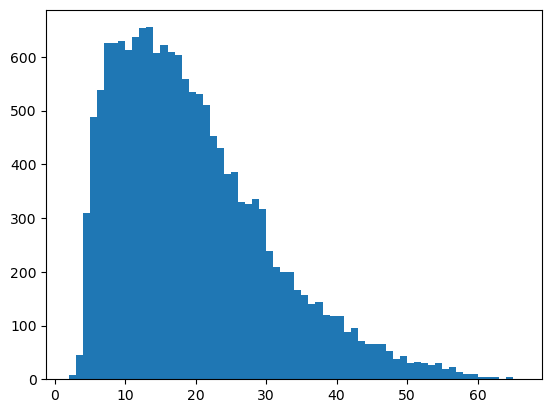

In [24]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins= len(set(lengths)))
plt.show()

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded_seq = pad_sequences(sequences, maxlen = 50, padding='post', truncating='post')
  return padded_seq

In [27]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [28]:
padded_train_seq[2]

array([ 17,   1,   7,   1,   5, 286,   2,   3, 495, 438,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [29]:
classes = set(labels)
print(classes)

{0, 1, 2, 3, 4, 5}


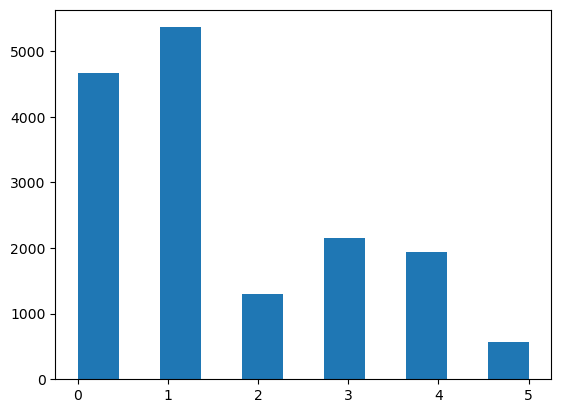

In [30]:
plt.hist(labels, bins = 11)
plt.show()

In [31]:
class_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_class = dict((v, k) for k, v in class_to_index.items())

In [32]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [33]:
index_to_class

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [34]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [35]:
train_labels = names_to_ids(labels)
print(train_labels[2])

3


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [36]:
maxlen = 50
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(1000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
)

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirection  (None, 50, 40)            5920      
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 31926 (124.71 KB)
Trainable params: 31926 (124.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [38]:
val_tweets, val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [39]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [40]:
h = model.fit(
    padded_train_seq, train_labels, validation_data = (val_seq, val_labels),
    epochs=20,
    callbacks = [     # if for consecutive 2 epochs the accuracy does not change than the model training will stop
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

Epoch 1/20
500/500 [==============================] - 18s 24ms/step - loss: 1.3376 - accuracy: 0.4652 - val_loss: 0.9210 - val_accuracy: 0.6685
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.7282 - accuracy: 0.7392 - val_loss: 0.6198 - val_accuracy: 0.7915
Epoch 3/20
500/500 [==============================] - 9s 17ms/step - loss: 0.5205 - accuracy: 0.8222 - val_loss: 0.5741 - val_accuracy: 0.8010
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.4448 - accuracy: 0.8462 - val_loss: 0.5104 - val_accuracy: 0.8275
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.3988 - accuracy: 0.8649 - val_loss: 0.4402 - val_accuracy: 0.8570
Epoch 6/20
500/500 [==============================] - 17s 33ms/step - loss: 0.3610 - accuracy: 0.8744 - val_loss: 0.4137 - val_accuracy: 0.8565
Epoch 7/20
500/500 [==============================] - 9s 17ms/step - loss: 0.3244 - accuracy: 0.8843 - val_loss: 0.3989 - val_accuracy: 0.85

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

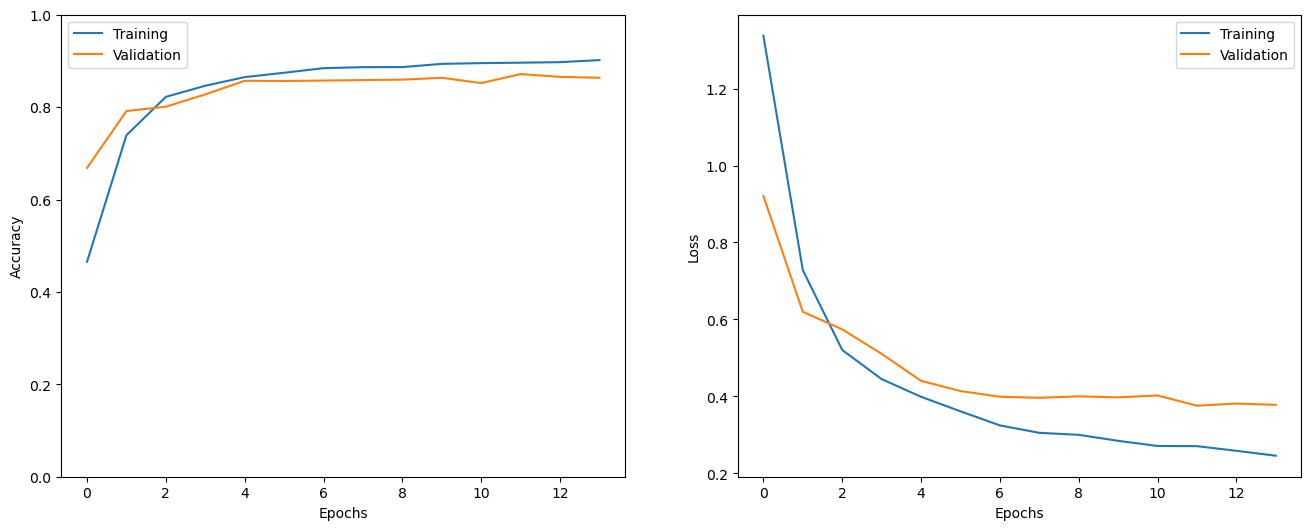

In [41]:
show_history(h)

In [42]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [43]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 2s 26ms/step - loss: 0.3675 - accuracy: 0.8655


In [44]:
i = random.randint(0, len(test_labels) - 1)

print("Sentence: ", test_tweets[i])
print("Emotions: ", index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion: ',pred_class)

Sentence:  i feel so unloved without you next to me but when im with you
Emotions:  0
1/1 [==============================] - 2s 2s/step
Predicted Emotion:  0


In [45]:
#preds = model.predict_classes(test_seq)
preds = np.argmax(model.predict(test_seq), axis=1)

63/63 [==============================] - 0s 6ms/step


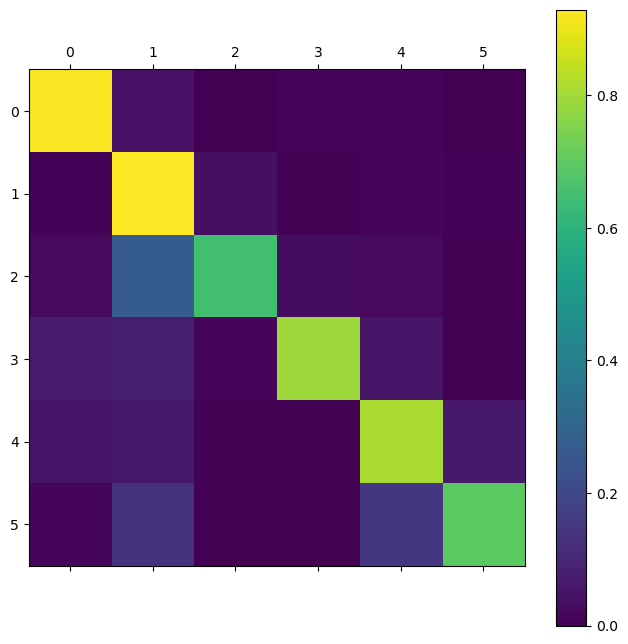

In [46]:
show_confusion_matrix(test_labels, preds, list(classes))

In [ ]:
# pred_probs = model.predict(val_seq)
# pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class indices

# # Ensure val_labels are integers
# true_labels = np.argmax(val_labels, axis=1) if len(val_labels.shape) > 1 else val_labels

# # Now compute metrics
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(true_labels, pred_labels)
# print("Accuracy:", accuracy)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\bussa\anaconda3\envs\atari_game\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\bussa\AppData\Local\Temp\ipykernel_15708\92753484.py", line 1, in <module>
    pred_probs = model.predict(val_seq)
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bussa\anaconda3\envs\atari_game\lib\site-packages\executing\executing.py", line 317, in executing
    args = executing_cache[key]
KeyError: (<code object run_code at 0x000001D09744B890, file "c:\Users\bussa\anaconda3\envs\atari_game\lib\site-packages\IPython\core\interactiveshell.py", line 3517>, 1995402688656, 76)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\bussa\anaconda3\envs\atari_game\lib\site-packages\IPyt

In [4]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Emotion labels mapping (based on your model's output classes)
label2int = {
  "sadness": 4,
  "joy": 2,
  "anger": 0,
  "fear": 1,
  "surprise": 5
}

# Load the pre-trained model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Function to predict emotion from the sentence
def predict_emotion(sentence):
    try:
        # Tokenize and prepare input
        inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=256).to(device)
        
        # Predict using the model
        with torch.no_grad():
            logits = model(**inputs).logits
        
        predicted_class = torch.argmax(logits, dim=1).item()
        
        # Get the predicted emotion from the label
        pred_emotion = label2int[predicted_class]
        return pred_emotion
    except Exception as e:
        return f"Error: {str(e)}"

# GUI Functionality to handle the button press
def handle_prediction():
    sentence = input_text.get("1.0", tk.END).strip()
    if not sentence:
        messagebox.showerror("Input Error", "Please enter a sentence!")
        return
    
    # Get emotion prediction
    emotion = predict_emotion(sentence)
    
    # Debug: Print the result
    print("Input Sentence:", sentence)
    print("Predicted Emotion:", emotion)
    
    # Update the result label with the predicted emotion
    result_label.config(text=f"Predicted Emotion: {emotion}")

# Function to launch the Tkinter GUI
def launch_gui():
    root = tk.Tk()
    root.title("Emotion Prediction")

    # Label for input prompt
    tk.Label(root, text="Enter your sentence:", font=("Arial", 12)).pack(pady=10)

    # Input Text Box (multiline for larger sentences)
    global input_text
    input_text = tk.Text(root, height=5, width=50, font=("Arial", 12))
    input_text.pack(pady=10)

    # Predict Button
    predict_button = tk.Button(root, text="Predict Emotion", command=handle_prediction, font=("Arial", 14))
    predict_button.pack(pady=10)

    # Result Label for displaying the predicted emotion
    global result_label
    result_label = tk.Label(root, text="Predicted Emotion: ", font=("Arial", 14))
    result_label.pack(pady=20)

    # Start the GUI loop
    root.mainloop()

# Launch the GUI
launch_gui()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Input Sentence: hi
Predicted Emotion: Error: 2
